# Apprentissage automatique supervisé
L'apprentissage automatique supervisé est une technique permettant de configurer (apprendre) les paramètres d'un modèle computationnel basé sur des données annotées. Dans cet exemple, nous fournissons des données annotées de manière éparse, ce qui signifie que nous n'annotons que certains des points de données donnés.

Voir aussi
* [Apprentissage supervisé (Wikipédia)](https://en.wikipedia.org/wiki/Supervised_learning)
* [Apprentissage supervisé dans scikit-learn](https://scikit-learn.org/stable/supervised_learning.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import jaccard_score, accuracy_score, precision_score, recall_score

# local import; this library is located in the same folder as the notebook
from data_generator import generate_biomodal_2d_data

Notre point de départ pour démontrer l'apprentissage automatique supervisé est une paire de mesures dans une distribution bimodale. Dans l'ensemble de données suivant, les objets ayant une plus grande surface sont généralement aussi plus allongés.

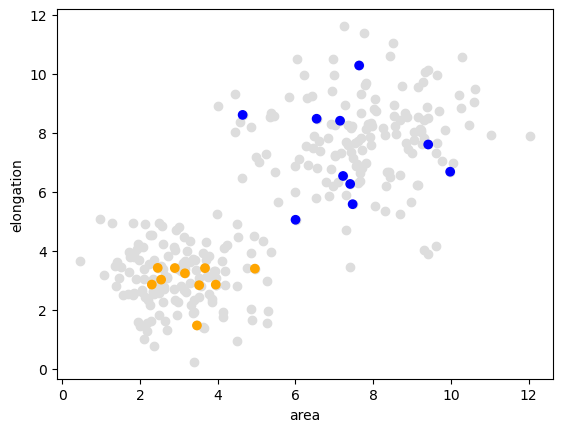

In [2]:
data = generate_biomodal_2d_data()

# select some data points
data_to_annotate = data[:20]

# manually annotate them
manual_annotation = [1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2]

# visualize the data
plt.scatter(data[:, 0], data[:, 1], c='#DDDDDD')
plt.xlabel('area')
plt.ylabel('elongation')

colors = ['orange', 'blue']
annotated_colors = [colors[i-1] for i in manual_annotation]

plt.scatter(data_to_annotate[:, 0], data_to_annotate[:, 1], c=annotated_colors)

## Séparation des données de test et de validation
Avant d'entraîner notre classificateur, nous devons diviser les données annotées en deux sous-ensembles. L'objectif est de permettre une validation non biaisée. Nous entraînons sur la première moitié des points de données annotés et mesurons la qualité sur la seconde moitié. [En savoir plus](https://scikit-learn.org/stable/common_pitfalls.html#data-leakage).

In [3]:
train_data = data_to_annotate[:10]
validation_data = data_to_annotate[10:]

train_annotation = manual_annotation[:10]
validation_annotation = manual_annotation[10:]

## Entraînement du classificateur
Avec les données sélectionnées à annoter et l'annotation manuelle, nous pouvons entraîner un [Classificateur de Forêt Aléatoire](https://en.wikipedia.org/wiki/Random_forest).

In [4]:
classifier = RandomForestClassifier()
classifier.fit(train_data, train_annotation)

RandomForestClassifier()

## Validation
Nous pouvons maintenant appliquer le classificateur aux données de validation et mesurer combien de ces points de données ont été analysés correctement.

In [5]:
result = classifier.predict(validation_data)

# Show results next to annotation in a table
result_annotation_comparison_table = {
    "Predicted": result,
    "Annotated": validation_annotation
}
pd.DataFrame(result_annotation_comparison_table)

,Predicted,Annotated
0,2,2
1,1,1
2,1,1
3,1,2
4,1,1
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


Pour obtenir des mesures standardisées de la qualité des résultats de notre classificateur, nous utilisons les [métriques de scikit-learn](https://scikit-learn.org/stable/modules/model_evaluation.html). Un aperçu des techniques est également disponible sur [Wikipédia](https://en.wikipedia.org/wiki/Precision_and_recall) et signifie dans ce contexte :
* [Précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score) : Quelle proportion des prédictions était correcte ?
* [Précision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) : Quelle proportion des `1` prédits était annotée comme `1` ?
* [Rappel (sensibilité)](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score) : Quelle proportion des `2` prédits a été annotée comme `2` ?

In [6]:
accuracy_score(validation_annotation, result)

0.9

In [7]:
precision_score(validation_annotation, result)

0.75

In [8]:
recall_score(validation_annotation, result)

1.0

Si vous voulez comprendre plus en détail comment les entrées sont comptées et les scores de qualité sont calculés, la [matrice de confusion multi-étiquettes](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.multilabel_confusion_matrix.html#sklearn.metrics.multilabel_confusion_matrix) peut valoir le coup d'œil.

## Prédiction
Après l'entraînement et la validation du classificateur, nous pouvons le réutiliser pour traiter d'autres ensembles de données. 
Il est rare de classer les données de test et de validation, car celles-ci devraient être utilisées uniquement pour construire le classificateur. Nous appliquons ici le classificateur aux points de données restants, qui n'ont pas été annotés.

In [9]:
remaining_data = data[20:]

prediction = classifier.predict(remaining_data)
prediction

array([1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1,
       2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1,
       2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 1, 1, 2,
       2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2])

Ici, nous visualisons maintenant l'ensemble complet des données avec les couleurs de classe.

Text(0, 0.5, 'elongation')

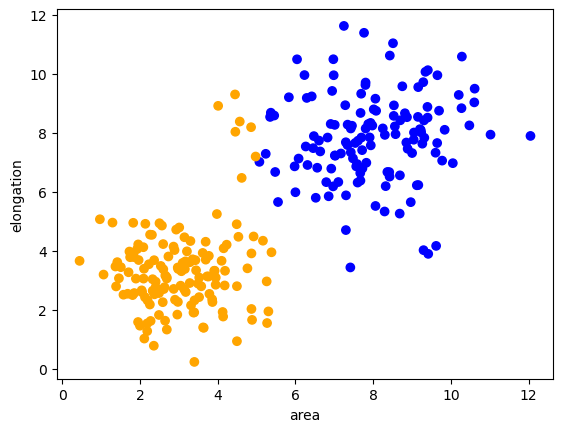

In [10]:
predicted_colors = [colors[i-1] for i in prediction]

plt.scatter(remaining_data[:, 0], remaining_data[:, 1], c=predicted_colors)
plt.xlabel('area')
plt.ylabel('elongation')

## Exercice
Entraînez une [Machine à Vecteurs de Support](https://scikit-learn.org/stable/modules/svm.html) et visualisez sa prédiction.

In [11]:
from sklearn.svm import SVC

classifier = SVC()